<a href="https://colab.research.google.com/github/Tansiv/ML-CSE475/blob/main/LAB4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Directory:
  Number of images: 3638
  Number of labels: 3628
Valid Directory:
  Number of images: 1001
  Number of labels: 682
Test Directory:
  Number of images: 511
  Number of labels: 501
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/train/images
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/train/labels
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/valid/images
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/valid/labels
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/test/images
Found folder: /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/test/labels
Checking train dataset...
All images and labels are correctly matched!
Checking valid dataset...
Missing label files for: {'uwg_g-98_jpg', 'uwg_g-868__flipv_jpg', 'uwg_yt-01__fli

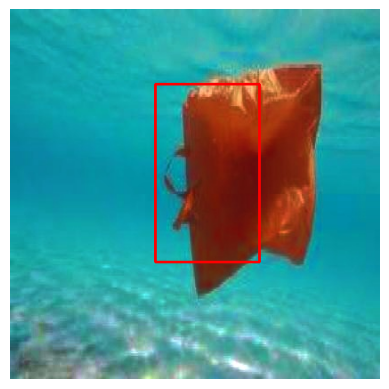

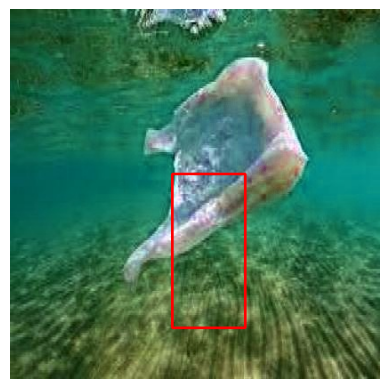

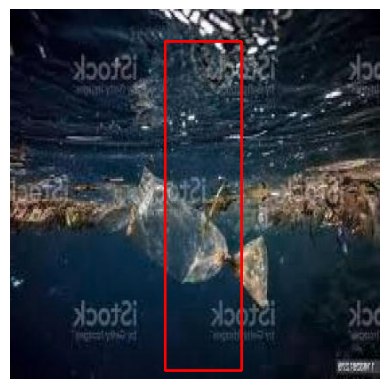

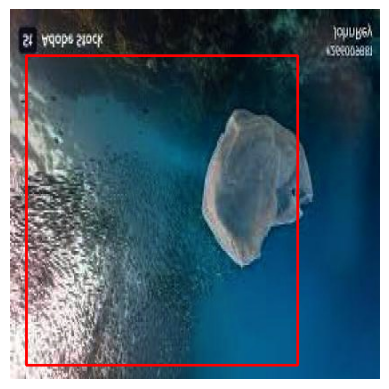

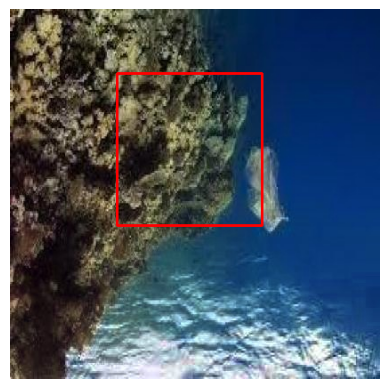

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/data.yaml, epochs=10, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=underwater_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False

100%|██████████| 755k/755k [00:00<00:00, 11.7MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

train: Scanning /content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics/train/labels... 264 images, 0 backgrounds, 0 corrupt:   7%|▋         | 264/3638 [03:35<12:02,  4.67it/s]

In [ ]:
# Section 1: Install Required Libraries
# Install YOLOv8 and related dependencies
!pip install ultralytics opencv-python-headless matplotlib

# Section 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Section 3: Define Dataset Path
dataset_path = '/content/drive/MyDrive/ML-LAB/lab 4/underwater_plastics'

# Section 4: Verify Dataset Structure
import os

def verify_dataset_structure(base_dir):
    """Verify the dataset structure and print the number of images and labels in each folder."""
    for folder in ['train', 'valid', 'test']:
        print(f"{folder.capitalize()} Directory:")
        try:
            images = os.listdir(os.path.join(base_dir, folder, 'images'))
            labels = os.listdir(os.path.join(base_dir, folder, 'labels'))
            print(f"  Number of images: {len(images)}")
            print(f"  Number of labels: {len(labels)}")
        except FileNotFoundError as e:
            print(f"Error: {e}")

verify_dataset_structure(dataset_path)

# Section 5: Check for Missing Folders and Files
def check_folders(base_dir):
    """Check if all expected folders exist in the dataset."""
    expected_folders = [
        os.path.join(base_dir, f"{split}/{type_}") for split in ['train', 'valid', 'test'] for type_ in ['images', 'labels']
    ]

    for folder in expected_folders:
        if not os.path.exists(folder):
            print(f"Missing folder: {folder}")
        else:
            print(f"Found folder: {folder}")

check_folders(dataset_path)

# Section 6: Check File Consistency
def check_file_consistency(images_folder, labels_folder):
    """Check if all images have corresponding labels and vice versa."""
    try:
        images = set(f.split('.')[0] for f in os.listdir(images_folder) if f.endswith('.jpg'))
        labels = set(f.split('.')[0] for f in os.listdir(labels_folder) if f.endswith('.txt'))

        missing_labels = images - labels
        missing_images = labels - images

        if missing_labels:
            print(f"Missing label files for: {missing_labels}")
        if missing_images:
            print(f"Missing image files for: {missing_images}")
        if not missing_labels and not missing_images:
            print("All images and labels are correctly matched!")
    except FileNotFoundError as e:
        print(f"Error: {e}")

for split in ['train', 'valid', 'test']:
    print(f"Checking {split} dataset...")
    check_file_consistency(
        os.path.join(dataset_path, f'{split}/images'),
        os.path.join(dataset_path, f'{split}/labels')
    )

# Section 7: Save the `data.yaml` File
data_yaml = f"""
path: {dataset_path}  # Base directory for the dataset
train: train/images  # Path to training images
val: valid/images    # Path to validation images

# Define number of classes and their names
nc: 15
names: ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal',
        'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
"""

with open(f"{dataset_path}/data.yaml", "w") as file:
    file.write(data_yaml)

# Section 8: Visualize Images with Bounding Boxes
import cv2
import matplotlib.pyplot as plt

def plot_image_with_bboxes(image_path, label_path):
    """Plot an image with bounding boxes drawn from its label file."""
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        with open(label_path, 'r') as f:
            bboxes = f.readlines()

        h, w, _ = img.shape
        for bbox in bboxes:
            cls, x, y, bw, bh = map(float, bbox.split())
            x_min = int((x - bw / 2) * w)
            y_min = int((y - bh / 2) * h)
            x_max = int((x + bw / 2) * w)
            y_max = int((y + bh / 2) * h)
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error visualizing image: {e}")

train_images = os.listdir(os.path.join(dataset_path, 'train/images'))
train_labels = os.listdir(os.path.join(dataset_path, 'train/labels'))

for img_name, lbl_name in zip(train_images[:5], train_labels[:5]):
    img_path = os.path.join(dataset_path, 'train/images', img_name)
    lbl_path = os.path.join(dataset_path, 'train/labels', lbl_name)
    plot_image_with_bboxes(img_path, lbl_path)

# Section 9: Train the YOLOv8 Model
from ultralytics import YOLO

model = YOLO('yolov8s.yaml')
model.train(
    data=f"{dataset_path}/data.yaml",
    epochs=10,
    imgsz=640,
    batch=5,
    name='underwater_yolov8',
    workers=4
)

# Section 10: Validate the Model
metrics = model.val()
print(metrics)

# Section 11: Predict on Test Images
trained_model = YOLO(os.path.join('/content', 'runs', 'detect', 'underwater_yolov8', 'weights', 'best.pt'))
test_images = os.listdir(os.path.join(dataset_path, 'test/images'))

for img_name in test_images[:5]:
    img_path = os.path.join(dataset_path, 'test/images', img_name)
    results = trained_model.predict(source=img_path, save=False, conf=0.5)

    for result in results:
        plt.imshow(result.plot())
        plt.axis('off')
        plt.show()

# Section 12: Fine-Tune the Model
model.train(
    data=f"{dataset_path}/data.yaml",
    epochs=10,
    imgsz=640,
    batch=32,
    lr0=0.001,
    name='underwater_yolov8_finetune',
    resume=True
)

# Section 13: Validate Fine-Tuned Model
model_path = os.path.join('/content', 'runs', 'detect', 'underwater_yolov8', 'weights', 'best.pt')
if os.path.exists(model_path):
    model = YOLO(model_path)
    results = model.val(data=f"{dataset_path}/data.yaml")
    print("Validation results saved successfully.")
else:
    print(f"Model file not found at: {model_path}")
